In [1]:
#多维向量输入@多层神经网络
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#数据集
xy=np.loadtxt('diabetes.csv.gz',delimiter=',',dtype=np.float32)
x_data=torch.from_numpy(xy[:,:-1])
y_data=torch.from_numpy(xy[:,[-1]])


In [3]:
#线性回归模型创建
class multlinearmodel(torch.nn.Module):
    def __init__(self):
        super(multlinearmodel,self).__init__()
        self.linear1=torch.nn.Linear(8,6)
        self.linear2=torch.nn.Linear(6,6)
        self.linear3=torch.nn.Linear(6,4)
        self.linear4=torch.nn.Linear(4,1)
        self.sigmoid1=torch.nn.ReLU()
        self.sigmoid2=torch.nn.Sigmoid()
        
    

    def forward(self,x):
        x=self.sigmoid1(self.linear1(x))
        x=self.sigmoid1(self.linear2(x))
        x=self.sigmoid1(self.linear3(x))
        x=self.sigmoid2(self.linear4(x))
        return x


In [4]:
#实例化
myline=multlinearmodel()

#损失，优化建立
criterion=torch.nn.BCELoss(reduction='mean')
optimizer=torch.optim.SGD(myline.parameters(),lr=0.05)

In [5]:
#训练模型
epo=[]
los=[]
for epoch in range(10000):
    #向前传播
    y_pred=myline.forward(x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())
    epo.append(epoch)
    los.append(loss.item())

    #反向传播
    optimizer.zero_grad()
    loss.backward()

    #更新
    optimizer.step()


0 0.6863536238670349
1 0.684877872467041
2 0.6834491491317749
3 0.6820662617683411
4 0.6807276010513306
5 0.6794322729110718
6 0.6781789660453796
7 0.6769664883613586
8 0.6757935285568237
9 0.6746593117713928
10 0.6735624670982361
11 0.6725021004676819
12 0.6714769601821899
13 0.6704862117767334
14 0.6695287227630615
15 0.6686035990715027
16 0.6677096486091614
17 0.6668461561203003
18 0.6660123467445374
19 0.6652071475982666
20 0.6644296646118164
21 0.6636791229248047
22 0.6629546284675598
23 0.6622553467750549
24 0.6615806221961975
25 0.6609296202659607
26 0.6603015065193176
27 0.659695565700531
28 0.6591112017631531
29 0.658547580242157
30 0.6580042839050293
31 0.6574802994728088
32 0.6569750905036926
33 0.6564881205558777
34 0.6560187935829163
35 0.6555665731430054
36 0.6551307439804077
37 0.654710590839386
38 0.6543056964874268
39 0.653915524482727
40 0.6535394787788391
41 0.6531773209571838
42 0.652828574180603
43 0.6524927616119385
44 0.6521693468093872
45 0.6518577337265015
46 0

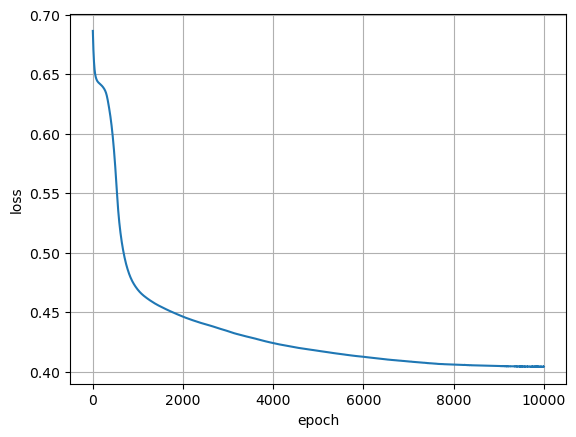

In [6]:
#数据可视化
plt.plot(epo,los)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)#显示网格
plt.show()